## This script takes individual files with MAG kofam annotations and compares gene representation in KEGG categories across categories. 

### Import all the dependencies

In [1]:
import os as os
import numpy as np
import pandas as pd
import glob as glob

### Navigate to working directory

In [2]:
os.chdir('/Users/nastassia.patin/Desktop/Projects/Lasker 2019/PacBio/euk-MAGs/eggnog')

### Import the "master" KO htext file and reformat it

In [3]:
# provide the directory where the master KO Orthology file is located
path = '/Users/nastassia.patin/Desktop/Workflows/KO_Orthology_ko00001.txt'

In [4]:
ko_master = pd.read_csv(path, sep='\t', header=None,
                       names=['Group','Subgroup1','Subgroup2','KO'])
ko_master.head()

,Group,Subgroup1,Subgroup2,KO
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844 HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K12407 GCK; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845 glk; glucokinase [EC:2.7.1.2]
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K01810 GPI, pgi; glucose-6-phosphate isomeras..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K06859 pgi1; glucose-6-phosphate isomerase, a..."


### The following steps edit the master file so the fields only contain text information about the gene function. They are optional if you want to keep the numerical codes associated with groups and subgroups.

In [5]:
# Split the function from the KO
ko_master[['KO', 'Function']] = ko_master['KO'].str.split(" ", n=1, expand=True)
# Split out the number label for groups and subgroups
ko_master[['Subgroup2', 'PATH']] = ko_master['Subgroup2'].str.split("[", n=1, expand=True)
ko_master = ko_master.drop('PATH', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Group']] = ko_master['Group'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup1']] = ko_master['Subgroup1'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup2']] = ko_master['Subgroup2'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
ko_master.head()

,Group,Subgroup1,Subgroup2,KO,Function
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1]
1,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K12407,GCK; glucokinase [EC:2.7.1.2]
2,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2]
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5..."
4,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K06859,"pgi1; glucose-6-phosphate isomerase, archaeal..."


#### Extract KO numbers from EggNOG output and match to KEGG categories in master file

In [6]:
def ko_function(eg, master, name):
    eg['KEGG_ko'] = eg['KEGG_ko'].str.replace('ko:','')
    ko_list = list(eg['KEGG_ko'])
    # extract only KOs that are in the ko_list from master file
    kos_funct = master.loc[master['KO'].isin(ko_list), :]
    kos_funct['MAG'] = name
    # filter out irrelevant categories
    exclude = ['Human Diseases','Brite Hierarchies','Organismal Systems',
                                    'Cellular community - prokaryotes']
    kos_funct_filt = kos_funct.loc[~kos_funct['Group'].str.contains('|'.join(exclude))]
    kos_funct_filt['MAG'] = name
    return(kos_funct_filt)

In [7]:
genecontent = []
for file in glob.glob("*.tsv"):
    eggnog = pd.read_csv(file, sep='\t', skiprows=4)
    a, b, c, d = file.split('.')
    df = ko_function(eggnog, ko_master, a)
    genecontent.append(df)

genecontent_df = pd.concat(genecontent)

<ipython-input-6-4462a620c155>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kos_funct['MAG'] = name
<ipython-input-6-4462a620c155>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kos_funct_filt['MAG'] = name
<ipython-input-6-4462a620c155>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [41]:
genecontent_df['Group'].unique()

array(['Metabolism', 'Genetic Information Processing',
       'Environmental Information Processing', 'Cellular Processes',
       'Not Included in Pathway or Brite'], dtype=object)

In [9]:
genecontent_df.head()

,Group,Subgroup1,Subgroup2,KO,Function,MAG
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",Bathycoccus
7,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00850,"pfkA, PFK; 6-phosphofructokinase 1 [EC:2.7.1.11]",Bathycoccus
12,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K03841,"FBP, fbp; fructose-1,6-bisphosphatase I [EC:3...",Bathycoccus
17,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01623,"ALDO; fructose-bisphosphate aldolase, class I...",Bathycoccus
23,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01803,"TPI, tpiA; triosephosphate isomerase (TIM) [E...",Bathycoccus


## Group genes by category and make bar charts

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

### Group by the highest category ("Group") and get counts for each category

In [11]:
mag_group = genecontent_df.groupby(['MAG', 'Group'])['Subgroup1'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
mag_group

MAG           Group                               
Bathycoccus   Cellular Processes                      0.184659
              Environmental Information Processing    0.120130
              Genetic Information Processing          0.270698
              Metabolism                              0.376623
              Not Included in Pathway or Brite        0.047890
Ostreococcus  Cellular Processes                      0.180901
              Environmental Information Processing    0.117477
              Genetic Information Processing          0.290450
              Metabolism                              0.365405
              Not Included in Pathway or Brite        0.045766
Name: Subgroup1, dtype: float64

In [13]:
df_group = pd.DataFrame(mag_group).reset_index()

<Figure size 1008x576 with 0 Axes>

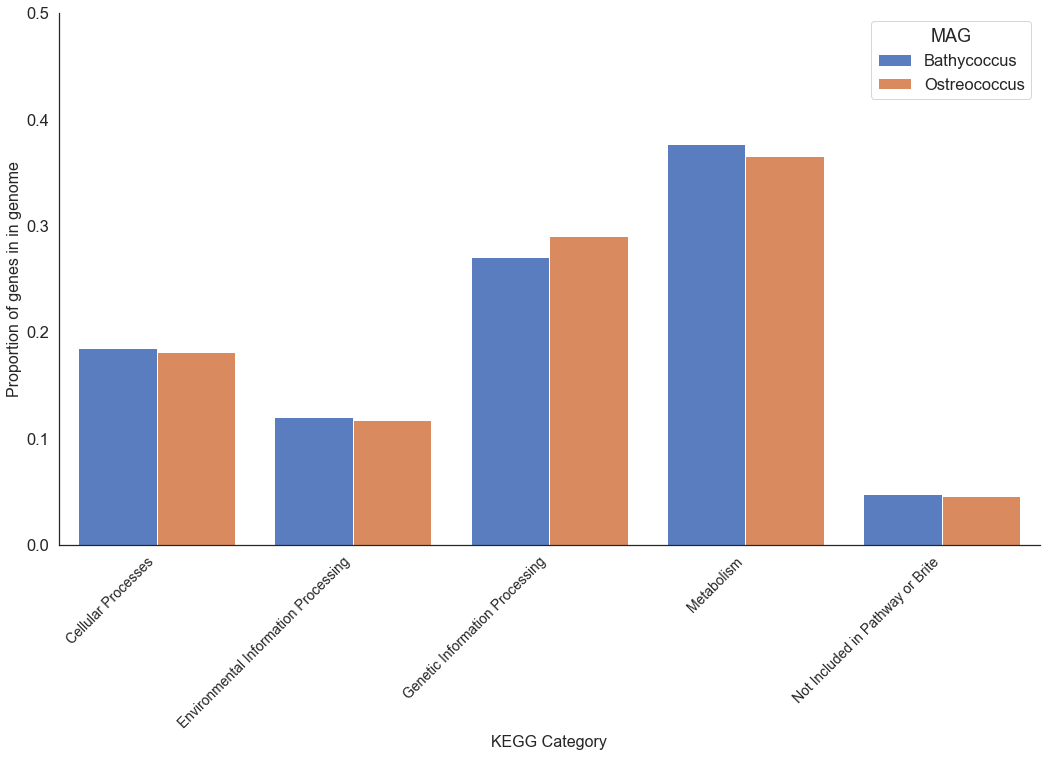

In [34]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Group", y="Subgroup1", hue="MAG", data=df_group, kind='bar', height=8.27, aspect=15/8.27,
                 palette=sns.color_palette("muted"), legend=False) 
plt.ylabel("Proportion of genes in in genome", size=16)
plt.xlabel("KEGG Category", size=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 0.5)
plt.legend(title="MAG")

plt.savefig("Picoeuk_MAG_genecontent.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Look at only the 'Metabolism' genes

In [38]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1'])['Subgroup2'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_metab = df_group.loc[(slice(None), ['Metabolism']), :] 
df_group_metab.head(10)

Subgroup2
MAG         Group      Subgroup1                                             
Bathycoccus Metabolism Amino acid metabolism                         0.066153
                       Biosynthesis of other secondary metabolites   0.010958
                       Carbohydrate metabolism                       0.073864
                       Energy metabolism                             0.051136
                       Glycan biosynthesis and metabolism            0.021104
                       Lipid metabolism                              0.043019
                       Metabolism of cofactors and vitamins          0.045455
                       Metabolism of other amino acids               0.014610
                       Metabolism of terpenoids and polyketides      0.012175
                       Nucleotide metabolism                         0.025568

In [39]:
df_group_metab = df_group_metab.reset_index()

<Figure size 1008x576 with 0 Axes>

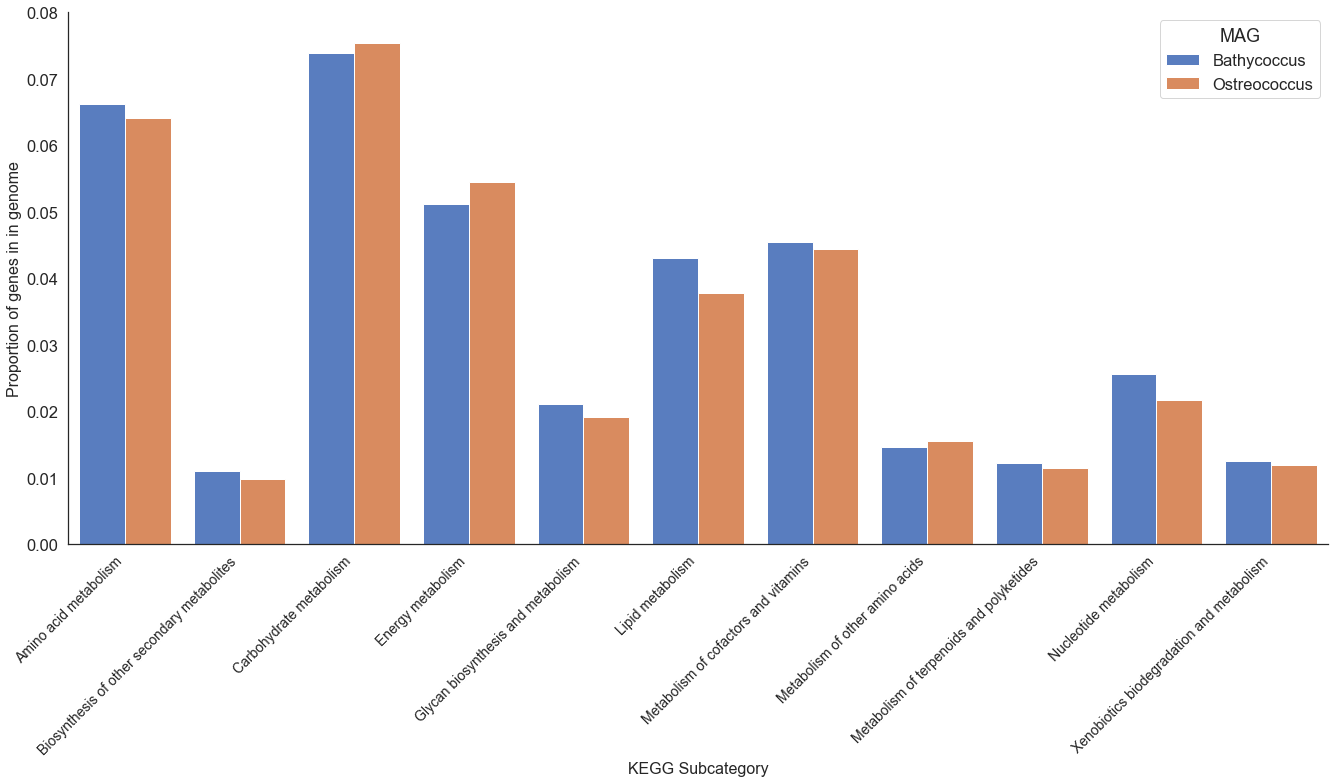

In [40]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_metab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted"), legend=False) 
plt.ylabel("Proportion of genes in in genome", size=16)
plt.xlabel("KEGG Subcategory", size=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 0.08)
plt.legend(title="MAG")

plt.savefig("Picoeuk_MAG_metabolism.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Look at only the 'Genetic Information Processing' genes

In [35]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1'])['Subgroup2'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_gip = df_group.loc[(slice(None), ['Genetic Information Processing']), :] 
df_group_gip.head(10)

Subgroup2
MAG          Group                          Subgroup1                                  
Bathycoccus  Genetic Information Processing Folding, sorting and degradation   0.075893
                                            Replication and repair             0.055195
                                            Transcription                      0.043831
                                            Translation                        0.095779
Ostreococcus Genetic Information Processing Folding, sorting and degradation   0.079279
                                            Replication and repair             0.055495
                                            Transcription                      0.048288
                                            Translation                        0.107387

In [36]:
df_group_gip = df_group_gip.reset_index()

<Figure size 1008x576 with 0 Axes>

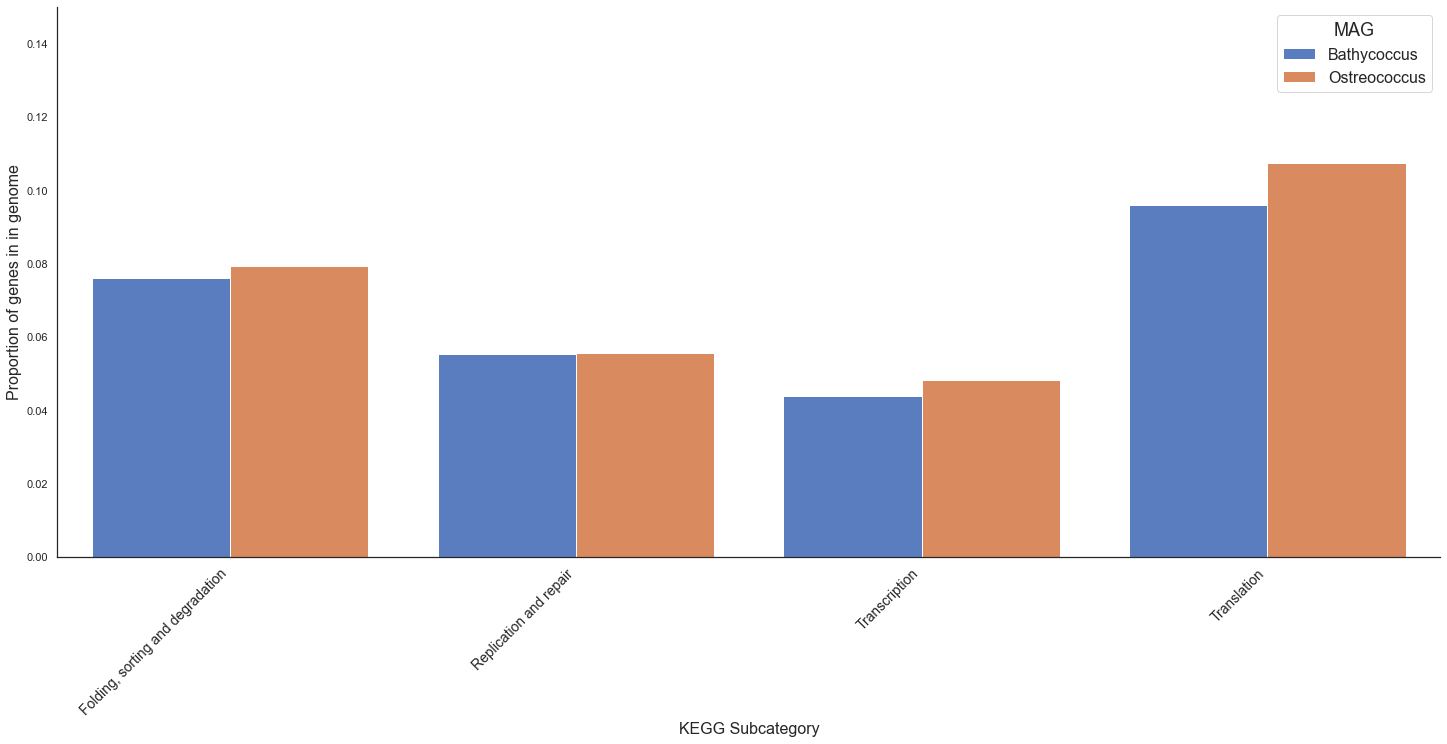

In [37]:
plt.figure(figsize=(14,8))
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_gip, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted"), legend=False) 
plt.ylabel("Proportion of genes in in genome", size=16)
plt.xlabel("KEGG Subcategory", size=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 0.15)
plt.legend(title="MAG", loc="upper right", fontsize=16, title_fontsize=18)

plt.savefig("Picoeuk_MAG_genetics.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Look at only "Cellular Processes" subcategory genes

In [26]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1'])['Subgroup2'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_cp = df_group.loc[(slice(None), ['Cellular Processes']), :] 
df_group_cp.head()

Subgroup2
MAG         Group              Subgroup1                                  
Bathycoccus Cellular Processes Cell growth and death              0.085633
                               Cell motility                      0.002435
                               Cellular community - eukaryotes    0.012581
                               Cellular community - prokaryotes   0.006088
                               Transport and catabolism           0.077922

In [27]:
df_group_cp = df_group_gip.reset_index()

<Figure size 1008x576 with 0 Axes>

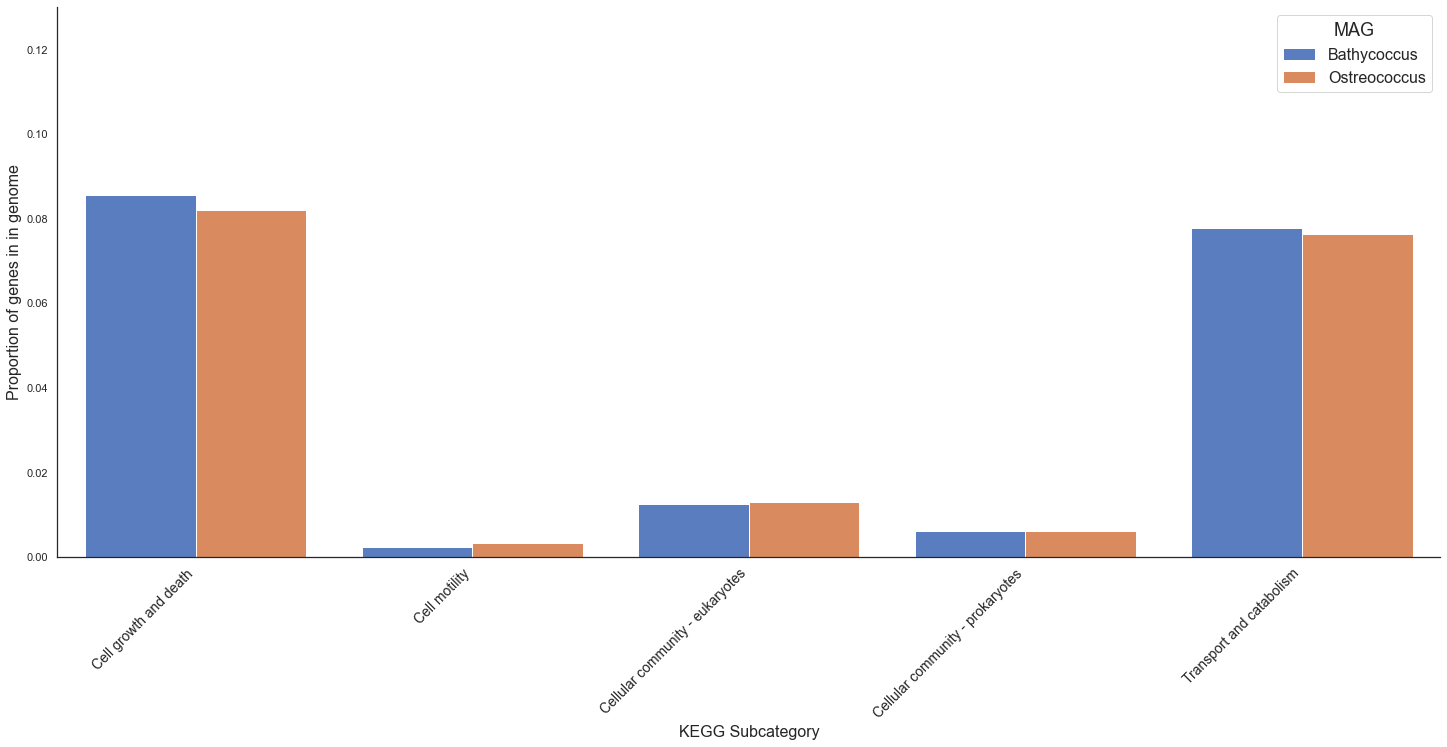

In [33]:
plt.figure(figsize=(14,8))
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_cp, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted"), legend=False) 
plt.ylabel("Proportion of genes in in genome", size=16)
plt.xlabel("KEGG Subcategory", size=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 0.13)
plt.legend(title="MAG", loc="upper right", fontsize=16, title_fontsize=18)

plt.savefig("Picoeuk_MAG_cellprocesses.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Look at only "Metabolism" subcategory genes

In [88]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1',
                                    'Subgroup2'])['KO'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_energymetab = df_group.loc[(slice(None), slice(None), ['Metabolism of cofactors and vitamins']), :] 
df_group_energymetab.head()

KO
MAG         Group      Subgroup1                            Subgroup2                                        
Bathycoccus Metabolism Metabolism of cofactors and vitamins Biotin metabolism                        0.002841
                                                            Folate biosynthesis                      0.005276
                                                            Lipoic acid metabolism                   0.000812
                                                            Nicotinate and nicotinamide metabolism   0.005276
                                                            One carbon pool by folate                0.003247

In [89]:
df_group_energymetab = df_group_energymetab.reset_index()

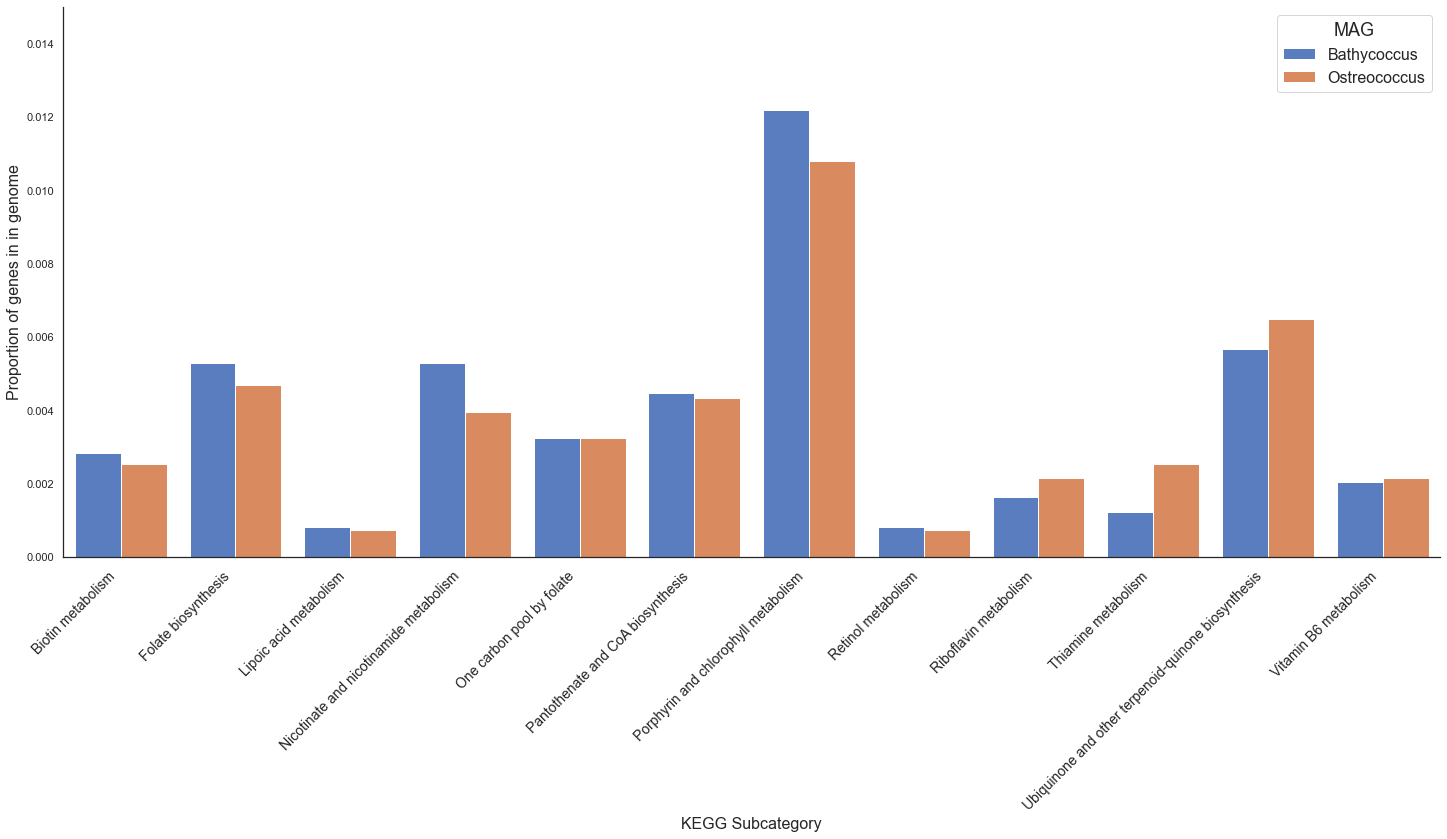

In [93]:
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup2", y="KO", hue="MAG", data=df_group_energymetab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted"), legend=False)
plt.ylabel("Proportion of genes in in genome", size=16)
plt.xlabel("KEGG Subcategory", size=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 0.015)
plt.legend(title="MAG", loc="upper right", fontsize=16, title_fontsize=18)

plt.savefig("Picoeuk_MAG_cofactorsmetabolism.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()